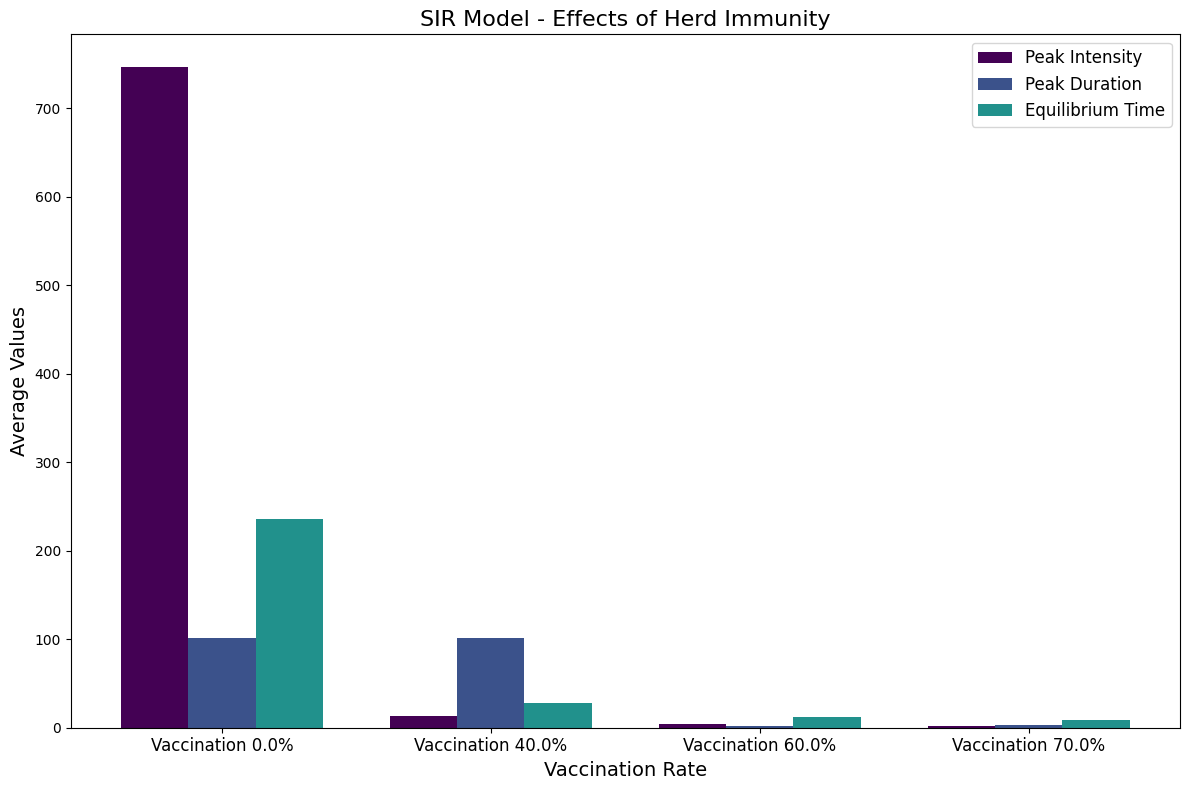

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random

# Parameters
GRID_SIZE = 150  # Grid size (50x50 grid)
TOTAL_POPULATION = GRID_SIZE * GRID_SIZE
INITIAL_INFECTED = 4
MAX_ITERATIONS = 1000
VACCINATION_THRESHOLD = 0.6  # Vaccination threshold (20%)
VACCINATION_EFFECT = 1  # Effectiveness of vaccination (80% of vaccinated people are immune)

# SIR Model: S = Susceptible, I = Infected, R = Recovered
def initialize_grid(vaccination_rate):
    grid = np.zeros((GRID_SIZE, GRID_SIZE))  # 0: susceptible, 1: infected, 2: recovered, 3: vaccinated
    num_vaccinated = int(TOTAL_POPULATION * vaccination_rate)
    vaccinated_positions = random.sample(range(TOTAL_POPULATION), num_vaccinated)
    
    # Vaccinate the individuals
    for pos in vaccinated_positions:
        x, y = divmod(pos, GRID_SIZE)
        grid[x, y] = 3  # Mark as vaccinated
    
    # Infect one individual randomly
    infected_pos = random.choice([i for i in range(TOTAL_POPULATION) if grid[i // GRID_SIZE, i % GRID_SIZE] == 0])
    x, y = divmod(infected_pos, GRID_SIZE)
    grid[x, y] = 1  # Mark as infected
    
    return grid

def update_grid(grid, beta, gamma):
    new_grid = grid.copy()
    infected_positions = np.argwhere(grid == 1)
    
    for (i, j) in infected_positions:
        # Try to infect neighboring cells
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 0), (0, 1)]:
            ni, nj = i + dx, j + dy
            if 0 <= ni < GRID_SIZE and 0 <= nj < GRID_SIZE:
                if grid[ni, nj] == 0:  # Susceptible
                    if random.random() < beta:  # Infection happens with probability beta
                        new_grid[ni, nj] = 1
        
        # Recover the infected individual
        if random.random() < gamma:  # Recovery happens with probability gamma
            new_grid[i, j] = 2  # Recovered
    
    return new_grid

def run_simulation(vaccination_rate, beta=0.5, gamma=0.2):
    grid = initialize_grid(vaccination_rate)
    peak_intensity = 0
    peak_duration = 0
    equilibrium_time = 0
    peak_count = 0
    
    infected_count = []
    
    for t in range(MAX_ITERATIONS):
        grid = update_grid(grid, beta, gamma)
        infected = np.sum(grid == 1)
        infected_count.append(infected)
        
        if infected > peak_intensity:
            peak_intensity = infected
            peak_count = t
        elif infected == peak_intensity:
            peak_duration += 1
        
        # Check for equilibrium (no more infected individuals)
        if infected == 0 and equilibrium_time == 0:
            equilibrium_time = t
    
    return peak_intensity, peak_duration, equilibrium_time

def plot_simulations():
    vaccination_rates = [0, VACCINATION_THRESHOLD - 0.2, VACCINATION_THRESHOLD, VACCINATION_THRESHOLD + 0.1]
    results = {"Peak Intensity": [], "Peak Duration": [], "Equilibrium Time": []}
    
    for vaccination_rate in vaccination_rates:
        peak_intensity_list = []
        peak_duration_list = []
        equilibrium_time_list = []
        
        for _ in range(10):
            peak_intensity, peak_duration, equilibrium_time = run_simulation(vaccination_rate)
            peak_intensity_list.append(peak_intensity)
            peak_duration_list.append(peak_duration)
            equilibrium_time_list.append(equilibrium_time)
        
        results["Peak Intensity"].append(np.mean(peak_intensity_list))
        results["Peak Duration"].append(np.mean(peak_duration_list))
        results["Equilibrium Time"].append(np.mean(equilibrium_time_list))
    
    # Plot results using viridis colormap
    labels = [f"Vaccination {rate * 100:.1f}%" for rate in vaccination_rates]
    
    x = np.arange(len(labels))
    width = 0.25  # Width of the bars
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Using viridis for better color
    cmap = plt.cm.viridis
    colors = [cmap(i / len(labels)) for i in range(len(labels))]
    
    ax.bar(x - width, results["Peak Intensity"], width, label='Peak Intensity', color=colors[0])
    ax.bar(x, results["Peak Duration"], width, label='Peak Duration', color=colors[1])
    ax.bar(x + width, results["Equilibrium Time"], width, label='Equilibrium Time', color=colors[2])
    
    ax.set_xlabel('Vaccination Rate', fontsize=14)
    ax.set_ylabel('Average Values', fontsize=14)
    ax.set_title('SIR Model - Effects of Herd Immunity', fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=12)
    ax.legend(fontsize=12)
    
    plt.tight_layout()
    plt.show()

# Run the simulation and plot the results
plot_simulations()
